<a href="https://colab.research.google.com/github/Jeshwanth2/AI-ML-Internship-Task-1/blob/main/Decision_Tree_Bank_Marketing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape

(11162, 17)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['deposit'] = le.fit_transform(df['deposit'])

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
if 'deposit' in numerical_cols:
    numerical_cols.remove('deposit')

correlation_with_deposit = df[numerical_cols].corrwith(df['deposit'])
print("Correlation of numerical features with 'deposit':\n", correlation_with_deposit)

Correlation of numerical features with 'deposit':
 age         0.034901
balance     0.081129
day        -0.056326
duration    0.451919
campaign   -0.128081
pdays       0.151593
previous    0.139867
dtype: float64


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


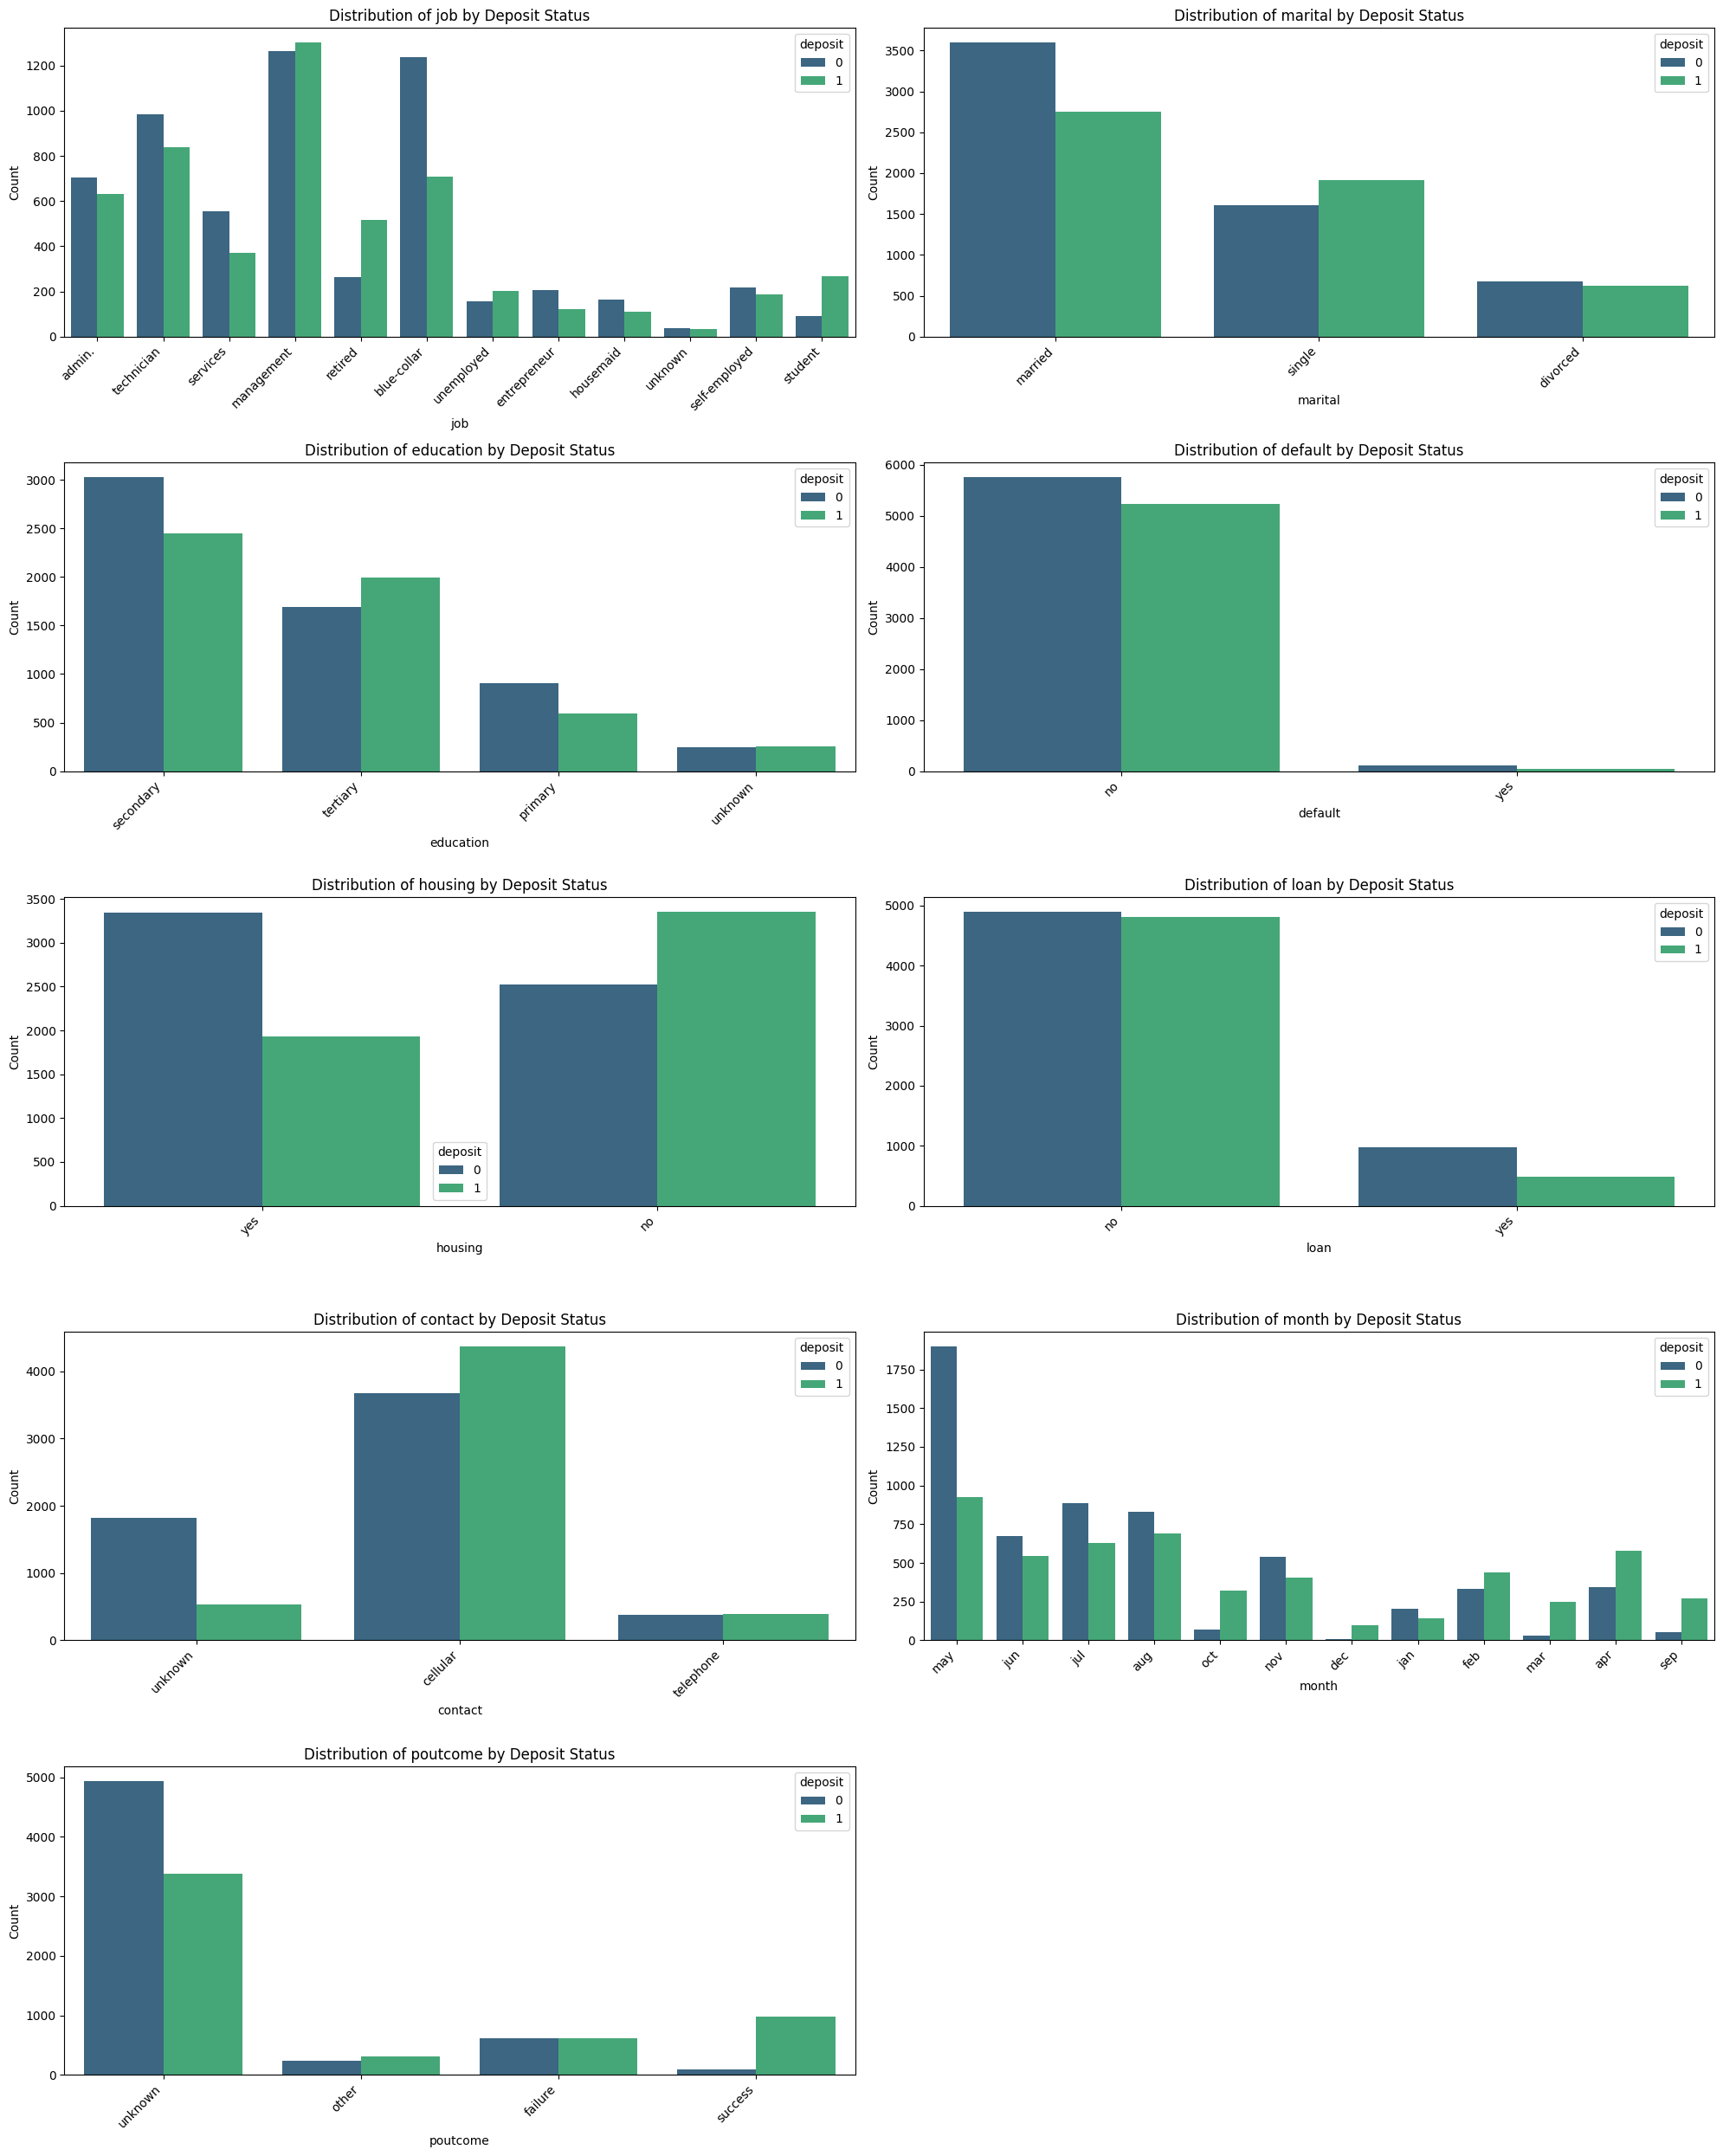

In [ ]:
plt.figure(figsize=(20, 25))
for i, column in enumerate(categorical_cols):
    plt.subplot(5, 2, i + 1)
    sns.countplot(data=df, x=column, hue='deposit', palette='viridis')
    plt.title(f'Distribution of {column} by Deposit Status')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
columns_to_process = ['poutcome', 'contact', 'job', 'marital', 'education', 'default', 'housing', 'loan']

for col in columns_to_process:
    if 'unknown' in df[col].unique():
        df[col].replace('unknown', np.nan, inplace=True)
        print(f"Replaced 'unknown' with NaN in column: {col}")

for col in columns_to_process:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled NaN values with mode ({mode_value}) in column: {col}")

print("\nValue counts after preprocessing:")
for col in ['poutcome', 'contact']:
    print(f"\n{col} value counts:\n{df[col].value_counts()}")

Replaced 'unknown' with NaN in column: poutcome
Replaced 'unknown' with NaN in column: contact
Replaced 'unknown' with NaN in column: job
Replaced 'unknown' with NaN in column: education
Filled NaN values with mode (failure) in column: poutcome
Filled NaN values with mode (cellular) in column: contact
Filled NaN values with mode (management) in column: job
Filled NaN values with mode (secondary) in column: education

Value counts after preprocessing:

poutcome value counts:
poutcome
failure    9554
success    1071
other       537
Name: count, dtype: int64

contact value counts:
contact
cellular     10388
telephone      774
Name: count, dtype: int64


/tmp/ipython-input-3678479583.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('unknown', np.nan, inplace=True)
/tmp/ipython-input-3678479583.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
columns_to_process = ['poutcome', 'contact', 'job', 'marital', 'education', 'default', 'housing', 'loan']

for col in columns_to_process:
    if 'unknown' in df[col].unique():
        df[col] = df[col].replace('unknown', np.nan)
        print(f"Replaced 'unknown' with NaN in column: {col}")

for col in columns_to_process:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
        print(f"Filled NaN values with mode ({mode_value}) in column: {col}")

print("\nValue counts after preprocessing:")
for col in ['poutcome', 'contact']:
    print(f"\n{col} value counts:\n{df[col].value_counts()}")


Value counts after preprocessing:

poutcome value counts:
poutcome
failure    9554
success    1071
other       537
Name: count, dtype: int64

contact value counts:
contact
cellular     10388
telephone      774
Name: count, dtype: int64


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'deposit' in categorical_cols:
    categorical_cols.remove('deposit')

print(f"Categorical columns to be OneHotEncoded: {categorical_cols}")

Categorical columns to be OneHotEncoded: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("First few rows of the DataFrame after OneHotEncoding:")
print(df_encoded.head())

print("\nInformation about the DataFrame after OneHotEncoding:")
df_encoded.info()

First few rows of the DataFrame after OneHotEncoding:
   age  balance  day  duration  campaign  pdays  previous  deposit  \
0   59     2343    5      1042         1     -1         0        1   
1   56       45    5      1467         1     -1         0        1   
2   41     1270    5      1389         1     -1         0        1   
3   55     2476    5       579         1     -1         0        1   
4   54      184    5       673         2     -1         0        1   

   job_blue-collar  job_entrepreneur  ...  month_jan  month_jul  month_jun  \
0            False             False  ...      False      False      False   
1            False             False  ...      False      False      False   
2            False             False  ...      False      False      False   
3            False             False  ...      False      False      False   
4            False             False  ...      False      False      False   

   month_mar  month_may  month_nov  month_oct  month_sep

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8929, 38)
Shape of X_test: (2233, 38)
Shape of y_train: (8929,)
Shape of y_test: (2233,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree Classifier model trained successfully.")

Decision Tree Classifier model trained successfully.


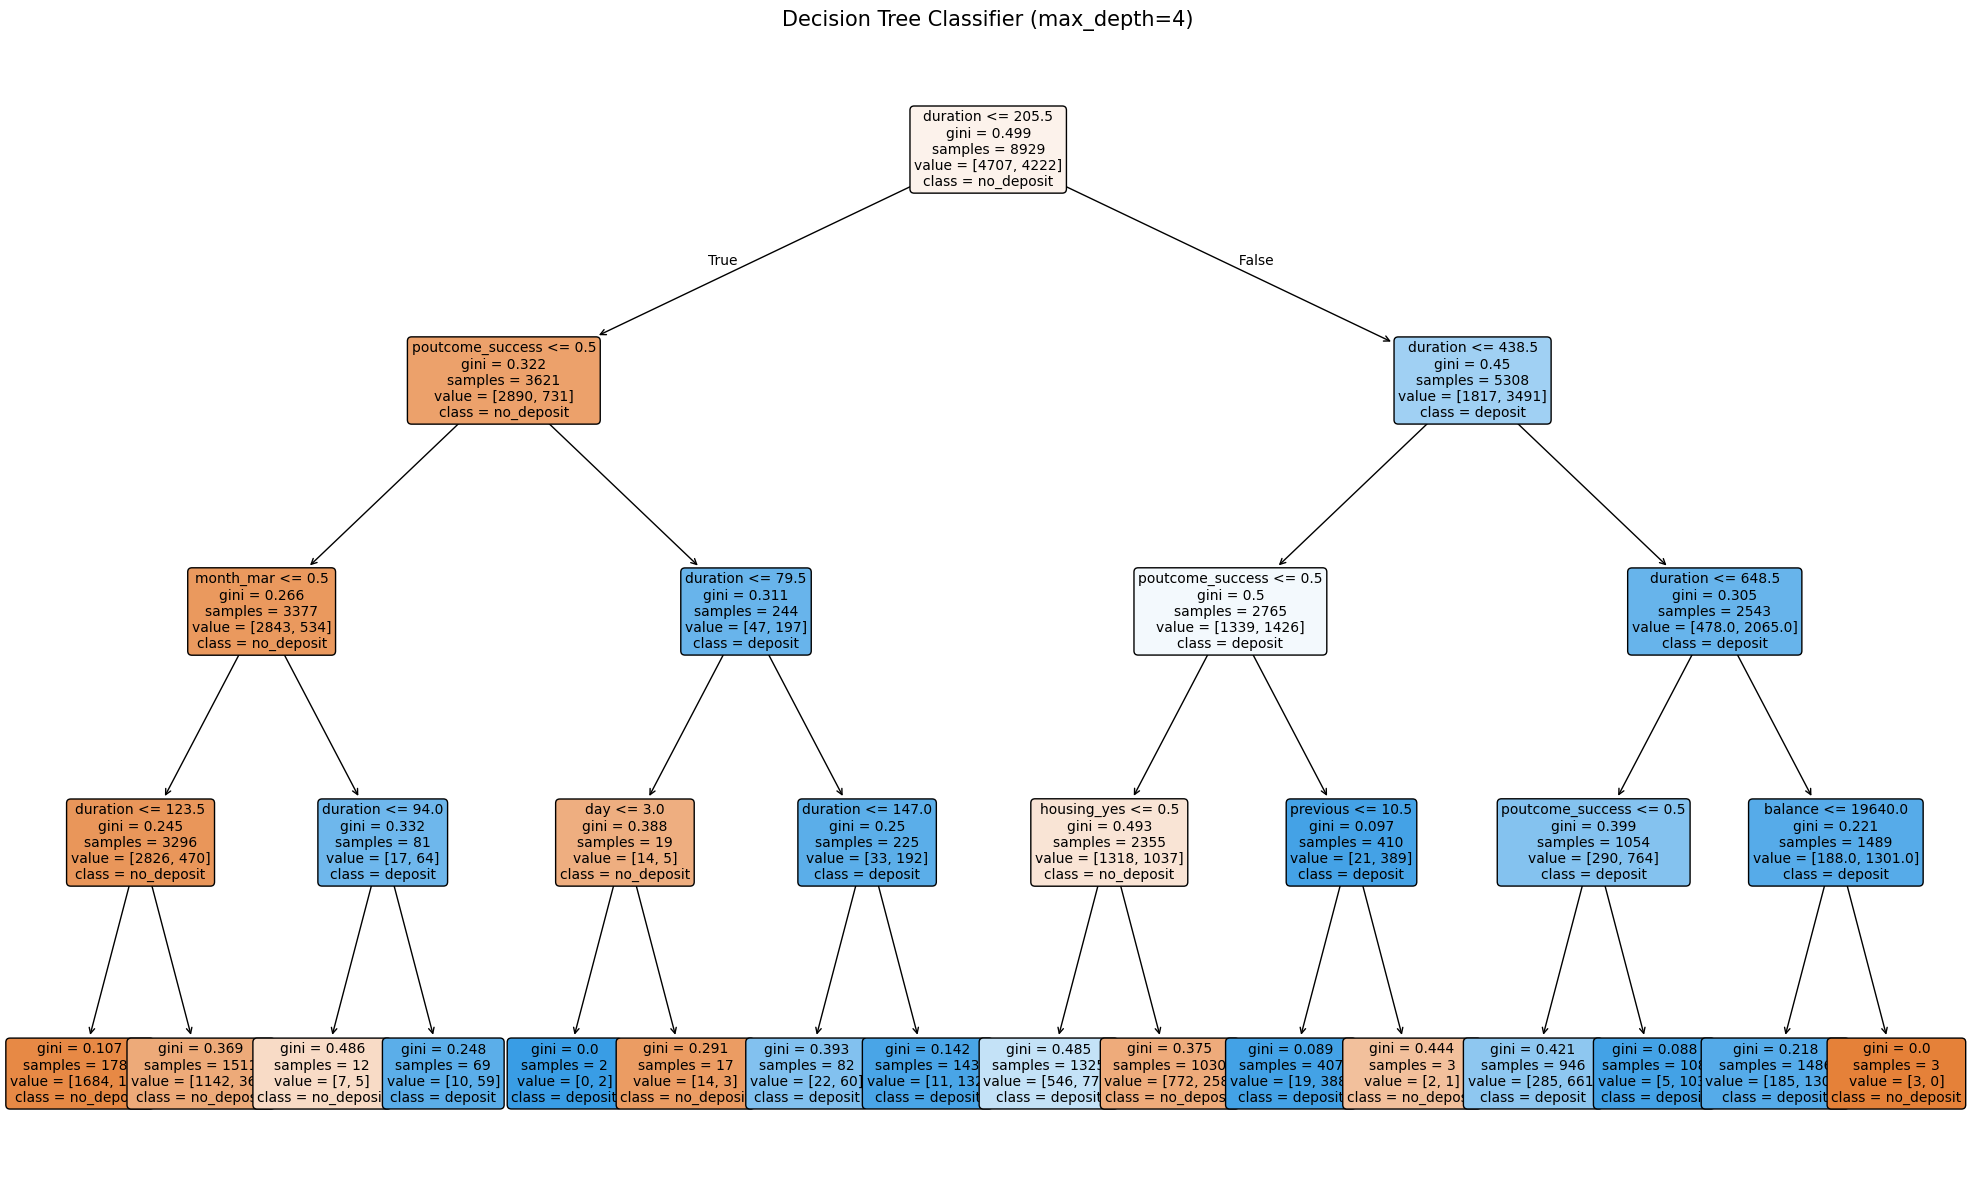

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plot_tree(dt_model,
          feature_names=X_train.columns.tolist(),
          class_names=['no_deposit', 'deposit'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Classifier (max_depth=4)', fontsize=15)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_pred = dt_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1166
           1       0.75      0.81      0.78      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



In [ ]:
from sklearn.metrics import accuracy_score

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

if (train_accuracy - test_accuracy) > 0.1:
    print("\nThere is a significant difference between training and testing accuracy, which might indicate overfitting.")
elif (train_accuracy - test_accuracy) < 0.01 and (train_accuracy - test_accuracy) > -0.01:
    print("\nThe training and testing accuracies are very close, indicating a good fit without significant overfitting.")
else:
    print("\nThe training and testing accuracies are reasonably close, suggesting a good balance without severe overfitting.")

Training Accuracy: 0.7962
Testing Accuracy: 0.7783

The training and testing accuracies are reasonably close, suggesting a good balance without severe overfitting.


In [ ]:
from sklearn.tree import export_text

# Generate text representation of the decision tree
tree_rules = export_text(dt_model,
                         feature_names=X_train.columns.tolist(),
                         class_names=['no_deposit', 'deposit'])

print(tree_rules)

|--- duration <= 205.50
|   |--- poutcome_success <= 0.50
|   |   |--- month_mar <= 0.50
|   |   |   |--- duration <= 123.50
|   |   |   |   |--- class: no_deposit
|   |   |   |--- duration >  123.50
|   |   |   |   |--- class: no_deposit
|   |   |--- month_mar >  0.50
|   |   |   |--- duration <= 94.00
|   |   |   |   |--- class: no_deposit
|   |   |   |--- duration >  94.00
|   |   |   |   |--- class: deposit
|   |--- poutcome_success >  0.50
|   |   |--- duration <= 79.50
|   |   |   |--- day <= 3.00
|   |   |   |   |--- class: deposit
|   |   |   |--- day >  3.00
|   |   |   |   |--- class: no_deposit
|   |   |--- duration >  79.50
|   |   |   |--- duration <= 147.00
|   |   |   |   |--- class: deposit
|   |   |   |--- duration >  147.00
|   |   |   |   |--- class: deposit
|--- duration >  205.50
|   |--- duration <= 438.50
|   |   |--- poutcome_success <= 0.50
|   |   |   |--- housing_yes <= 0.50
|   |   |   |   |--- class: deposit
|   |   |   |--- housing_yes >  0.50
|   |   |   